In [1]:
from Utils import *
from import_data import * 

In [2]:
from keras.datasets import mnist
from sklearn.decomposition import PCA

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Using TensorFlow backend.
/home/antonio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/antonio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/antonio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/antonio/.local/lib/python3.6/site-packages/tensorflow/py

Traning data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


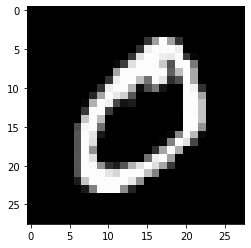

In [3]:
# pick a sample to plot
sample = 1
image = x_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
num = 10
images = x_train[:num]
labels = y_train[:num]

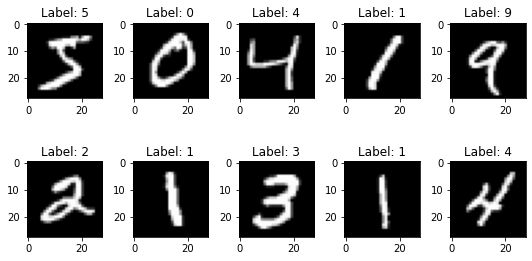

In [5]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
x_train_flat = x_train.reshape(-1,784)

In [7]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_mnist = pd.DataFrame(x_train_flat,columns=feat_cols)
df_mnist['label'] = y_train

In [8]:
print('Size of the dataframe: {}'.format(df_mnist.shape))
df=df_mnist.sample(frac=.02)
del df_mnist

Size of the dataframe: (60000, 785)


In [9]:
df.shape

(1200, 785)

In [10]:
g = df.groupby('label')
df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
df.label.value_counts()

9    99
8    99
7    99
6    99
5    99
4    99
3    99
2    99
1    99
0    99
Name: label, dtype: int64

In [11]:
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
label                                                                     
0     0       0       0       0       0       0       0       0       0   
      1       0       0       0       0       0       0       0       0   
      2       0       0       0       0       0       0       0       0   
      3       0       0       0       0       0       0       0       0   
      4       0       0       0       0       0       0       0       0   

         pixel8  pixel9  ...  pixel775  pixel776  pixel777  pixel778  \
label                    ...                                           
0     0       0       0  ...         0         0         0         0   
      1       0       0  ...         0         0         0         0   
      2       0       0  ...         0         0         0         0   
      3       0       0  ...         0         0         0         0   
      4       0       0  ...         0         0         0         0   

         pixel779  pixel780  pixel781  pixel782  pixel783  label  
label                                                             
0     0         0         0         0         0         0      0  
      1         0         0         0         0         0      0  
      2         0         0         0         0         0      0  
      3         0         0         0         0         0      0  
      4         0         0         0         0         0      0  

[5 rows x 785 columns]

In [12]:
pca_mnist = PCA(n_components=7)
principalComponents_mnist = pca_mnist.fit_transform(df.iloc[:,:-1])

In [13]:
principalComponents_mnist.shape

(990, 7)

In [14]:
data_pca = pd.DataFrame(data = principalComponents_mnist,
                        columns = ['x'+str(i) for i in range(principalComponents_mnist.shape[1])])
data_pca['Y'] = df.iloc[:,-1:].to_numpy()

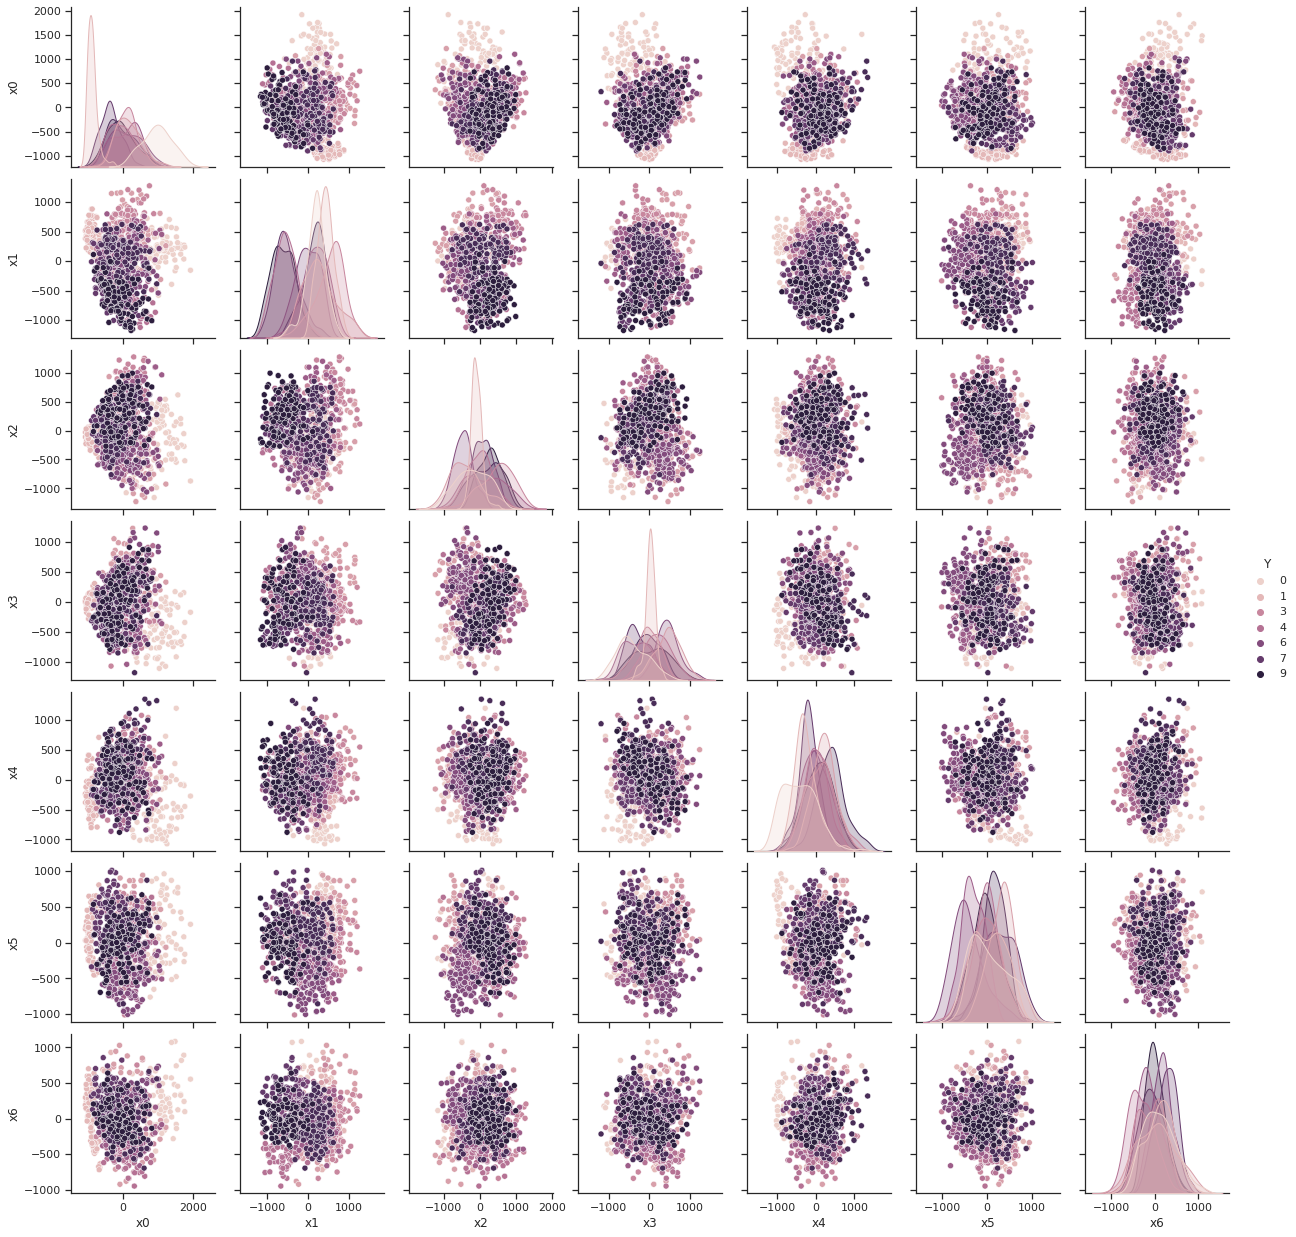

In [15]:
sns.set_theme(style="ticks")
sns.pairplot(data_pca, hue="Y")
plt.show()

<AxesSubplot:xlabel='x0', ylabel='x2'>

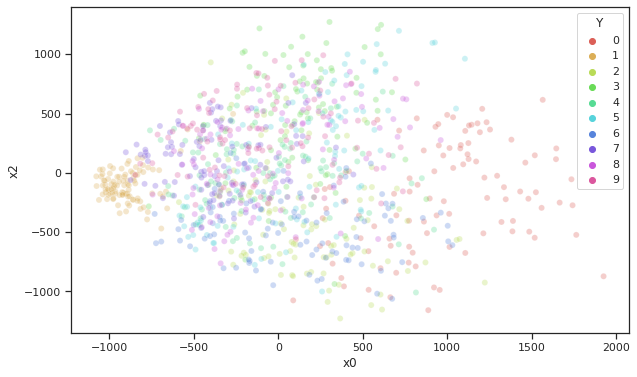

In [16]:
cols=["x0", "x2"]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=cols[0], y=cols[1],
    hue="Y",
    palette=sns.color_palette("hls", len(data_pca.Y.unique())),
    data=data_pca,
    legend="full",
    alpha=0.3
)

In [17]:
c0=0
c1=9
data = data_pca.copy()

In [18]:
data = data[(data.Y==c0) | (data.Y==c1)]
data.Y = ((data.Y)-c0)/(c1-c0)

In [19]:
x_train = data[cols].to_numpy()
X = (x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train))
Y = data.Y.to_numpy()

<AxesSubplot:xlabel='x0', ylabel='x2'>

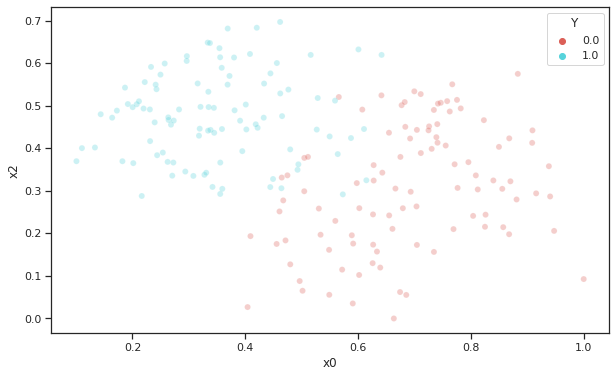

In [20]:
df = pd.DataFrame(X, columns=cols)
df['Y']=Y
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=cols[0], y=cols[1],
    hue="Y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

In [21]:
# pad the vectors to size 2^2 with constant values
padding = 0.3 * np.ones((len(X), 1))
X_pad = np.c_[np.c_[X, padding], np.zeros((len(X), 1))]
print("First X sample (padded)    :", X_pad[0])

# normalize each input
normalization = np.sqrt(np.sum(X_pad ** 2, -1))
X_norm = (X_pad.T / normalization).T
print("First X sample (normalized):", X_norm[0])

# angles for state preparation are new features
features = np.nan_to_num((np.array([get_angles(x) for x in X_norm])))
print("First features sample      :", features[0])

First X sample (padded)    : [0.45557226 0.17527852 0.3        0.        ]
First X sample (normalized): [0.79513811 0.30592432 0.52360834 0.        ]
First features sample      : [ 1.10216162 -0.          0.         -0.36728554  0.36728554]


In [22]:
def get_Sx(ang=None, x=None, pad=True):
    backend = Aer.get_backend('unitary_simulator')

    if pad==True:
        q = QuantumRegister(2)
        circuit = QuantumCircuit(q)
        circuit = state_preparation(ang, circuit, [0, 1])
    elif pad==False:
        x = x.astype(complex)
        q = QuantumRegister(1)
        circuit = QuantumCircuit(q)
        circuit.initialize(x, [q])

    job = execute(circuit, backend)
    result = job.result()
    U = result.get_unitary(circuit)
    S = Operator(U)
    return S

In [23]:
def linear_operator(param, pad=True):
    backend = Aer.get_backend('unitary_simulator')
    '''pad variable influences the size of params vector'''
    if pad==True:
        data = QuantumRegister(2)
        qc = QuantumCircuit(data)
        qc.u3(param[0], param[1], param[2], data[0])
        qc.u3(param[3], param[4], param[5], data[1])
        qc.cx(data[0], data[1])
    elif pad==False:
        data = QuantumRegister(1)
        qc = QuantumCircuit(data)
        qc.u3(param[0], param[1], param[2], data)

    job = execute(qc, backend)
    result = job.result()

    U = result.get_unitary(qc)
    G = Operator(U)
    return G


In [24]:
def sigma(pad=True):
    backend = Aer.get_backend('unitary_simulator')
    if pad==True:
        data = QuantumRegister(2)
        qc = QuantumCircuit(data)
        qc.id(data)
    if pad==False:
        data = QuantumRegister(1)
        qc = QuantumCircuit(data)
        qc.id(data)

    job = execute(qc, backend)
    result = job.result()

    U = result.get_unitary(qc)
    I = Operator(U)
    return I

In [25]:
def R_gate(beta):
    backend = Aer.get_backend('unitary_simulator')
    control = QuantumRegister(1)
    qc = QuantumCircuit(control)
    qc.ry(beta, control)

    job = execute(qc, backend)
    result = job.result()

    U = result.get_unitary(qc)
    R = Operator(U)
    return R

In [26]:
def create_circuit(parameters=None, x=None, pad=True):
    n_params=len(parameters)
    
    beta = parameters[0]
    theta1 = parameters[1:int((n_params+1)/2)]
    theta2 = parameters[int((n_params+1)/2):int(n_params)]

    control = QuantumRegister(1, 'control')
    data = QuantumRegister(2, 'x')
    temp = QuantumRegister(2, 'temp')
    c = ClassicalRegister(1)
    qc = QuantumCircuit(control, data, temp, c)

    S=get_Sx(ang=x)
    qc.unitary(S, data, label='$S_{x}$')

    R=R_gate(beta)
    qc.unitary(R, control, label='$R_{Y}(β)$')

    qc.barrier()
    qc.cswap(control, data[0], temp[0])
    qc.cswap(control, data[1], temp[1])


    G1 = linear_operator(theta1)
    qc.unitary(G1, data, label='$G(θ_{1})$')

    G2 = linear_operator(theta2)
    qc.unitary(G2, temp, label='$G(θ_{2})$')
    
    qc.cswap(control, data[1], temp[1])
    qc.cswap(control, data[0], temp[0])

    qc.barrier()

    sig = sigma()
    qc.unitary(sig, data, label='$Σ$')

    qc.barrier()
    qc.measure(data[0], c)
    return qc

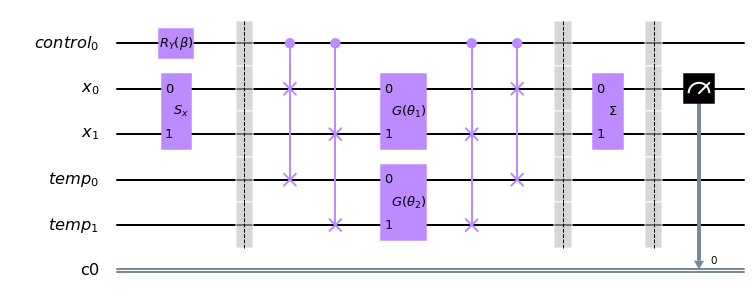

In [27]:
qc=create_circuit(parameters=range(14), x=features[0])
qc.draw(output='mpl')

In [28]:
def execute_circuit(parameters, x=None, shots=1000, print=False):
    backend = BasicAer.get_backend('qasm_simulator')

    circuit=create_circuit(parameters, x)
    if print:
        circuit.draw(output='mpl')
        plt.show()
    result = execute(circuit, backend, shots=shots).result()

    counts = result.get_counts(circuit)
    result = np.zeros(2)
    for key in counts:
        result[int(key, 2)] = counts[key]
    result /= shots
    return result[1]



def cost(params, X, labels):
    predictions = [execute_circuit(params, x) for x in X]
    return binary_crossentropy(labels, predictions)

In [35]:
X = features.copy()
# seed=615 # seed=974 # iris:359, gaussian:527 seed=355
seed=np.random.randint(0,10**3,1)[0]
print(seed)
np.random.seed(seed)
init_params = (0.01*np.random.randn(13))
print(init_params)

345
[ 0.01469248 -0.01150144  0.02519226 -0.00082478 -0.00033601 -0.01636656
 -0.00412092  0.01784949  0.00042383 -0.00619732 -0.00991691  0.00136467
  0.00656681]


In [37]:
num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
X_train = X[index[:num_train]]
Y_train = Y[index[:num_train]]
X_val = X[index[num_train:]]
Y_val = Y[index[num_train:]]
batch_size = 10
T = 10
acc_final_tr = 0
acc_final_val = 0

In [31]:
optimizer_full = AQGD(maxiter=10, eta=1.0, disp=True)
obj_function = lambda params: cost(params, X_train, Y_train)
point, value, nfev = optimizer_full.optimize(len(init_params), obj_function, initial_point=init_params)

probs_train = [execute_circuit(point, x) for x in X_train]
probs_val = [execute_circuit(point, x) for x in X_val]

predictions_train = [predict(p) for p in probs_train]
predictions_val = [predict(p) for p in probs_val]

acc_train = accuracy(Y_train, predictions_train)
acc_val = accuracy(Y_val, predictions_val)

print("Final model: Cost: {:0.7f} | Acc train: {:0.3f} | Acc validation: {:0.3f} "
      "".format(cost(point, X_train, Y_train), acc_train, acc_val))

In [ ]:
optimizer_step = AQGD(maxiter=1, eta=1.0, disp=False)
# execute_circuit(current_params, x=X[2], print=True)
point=init_params

for i in range(T):
    batch_index = np.random.randint(0, num_train, (batch_size,))
    X_batch = X_train[batch_index]
    Y_batch = Y_train[batch_index]

    obj_function = lambda params: cost(params, X_batch, Y_batch)
    point, value, nfev = optimizer_step.optimize(len(point), obj_function, initial_point=point)

    # Compute predictions on train and validation set
    probs_train = [execute_circuit(point, x) for x in X_train]
    probs_val = [execute_circuit(point, x) for x in X_val]

    predictions_train = [predict(p) for p in probs_train]
    predictions_val = [predict(p) for p in probs_val]

    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    if acc_final_tr <= acc_train:
        best_param = point
        acc_final_tr = acc_train
        acc_final_val = acc_val
        iteration = i

    print(
        "Iter: {:5d} | Cost: {:0.7f} | Acc train: {:0.3f} | Acc validation: {:0.3f} "
        "".format(i + 1, cost(point, X_train, Y_train), acc_train, acc_val))

Iter:     1 | Cost: 0.2054610 | Acc train: 0.804 | Acc validation: 0.720 
Iter:     2 | Cost: 0.1981448 | Acc train: 0.845 | Acc validation: 0.720 
Iter:     3 | Cost: 0.1979462 | Acc train: 0.838 | Acc validation: 0.740 


In [33]:
point=best_param

probs_train = [execute_circuit(point, x) for x in X_train]
probs_val = [execute_circuit(point, x) for x in X_val]

predictions_train = [predict(p) for p in probs_train]
predictions_val = [predict(p) for p in probs_val]

acc_train = accuracy(Y_train, predictions_train)
acc_val = accuracy(Y_val, predictions_val)

print("Final model: Cost: {:0.7f} | Acc train: {:0.3f} | Acc validation: {:0.3f} "
      "".format(cost(point, X_train, Y_train), acc_train, acc_val))

Final model: Cost: 0.1825008 | Acc train: 0.892 | Acc validation: 0.820 


In [34]:
# 149
# [ 1.01809448e-05  1.09792946e-05 -2.55131857e-04 -1.26979126e-04
#  -6.85864880e-05  1.59679450e-05  8.71846889e-05 -1.76991592e-05
#  -4.70542736e-05 -4.32973446e-05  4.29968851e-05  2.83535529e-05
#   1.08145484e-04]